# **ACP (Principal Component Analysis) et clustering pour séquencer les groupes de pays où exporter du poulet bio**

# **I. PCA**

## **1. Preliminary**

### **1.1. Imports**

In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

### **2.1.2. Graphics and Options**

In [2]:
#chargement de seaborn
sns.set()

### **2.1.3. Chargement des données**

In [3]:
df = pd.read_excel("data.xlsx", index_col=0)
df.head()

,GDP gr. (22),US$/cap (22),Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),Food inf. (09/23),Pop. (21),"Pop. gr. (%, 22)","Chick. prod. (t, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)"
country,,,,,,,,,,,,,
Albania,6.139017,6765.266307,2487,1909,12.340000,1.204,263,7.879296,2854710,-1.215790,16335.57,2.21,5.7
Algeria,1.533163,4273.937040,2290,1784,6.560000,0.964,96,13.928493,44177969,1.628339,274862.81,9.84,6.2
Angola,-0.096755,3256.343084,2127,1674,9.700000,1.011,106,15.299118,34503774,3.096753,58532.79,14.18,1.7
Antigua and Barbuda,8.880997,17071.659371,2464,1904,21.193427,0.682,349,4.543181,93219,0.581876,88.31,13.90,0.9
Argentina,3.989131,13903.886244,2436,1878,45.160000,0.669,601,150.132343,45276780,0.925835,2319000.00,1.54,51.2


## **2. Data Preparation**

In [4]:
df.head()

,GDP gr. (22),US$/cap (22),Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),Food inf. (09/23),Pop. (21),"Pop. gr. (%, 22)","Chick. prod. (t, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)"
country,,,,,,,,,,,,,
Albania,6.139017,6765.266307,2487,1909,12.340000,1.204,263,7.879296,2854710,-1.215790,16335.57,2.21,5.7
Algeria,1.533163,4273.937040,2290,1784,6.560000,0.964,96,13.928493,44177969,1.628339,274862.81,9.84,6.2
Angola,-0.096755,3256.343084,2127,1674,9.700000,1.011,106,15.299118,34503774,3.096753,58532.79,14.18,1.7
Antigua and Barbuda,8.880997,17071.659371,2464,1904,21.193427,0.682,349,4.543181,93219,0.581876,88.31,13.90,0.9
Argentina,3.989131,13903.886244,2436,1878,45.160000,0.669,601,150.132343,45276780,0.925835,2319000.00,1.54,51.2


In [5]:
df.tail()

,GDP gr. (22),US$/cap (22),Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),Food inf. (09/23),Pop. (21),"Pop. gr. (%, 22)","Chick. prod. (t, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)"
country,,,,,,,,,,,,,
Uruguay,5.028121,20085.762819,2431,1874,21.06,0.615000,295,4.860331,3426260,-0.101211,74646.00,1.91,21.8
Uzbekistan,3.496044,2309.543263,2349,1824,2.74,0.875922,241,10.599530,34081449,2.077645,148800.00,1.15,4.4
Viet Nam,7.228978,4163.514055,2297,1784,13.90,1.183000,297,2.873432,97468029,0.734794,1066853.73,2.66,10.9
Zambia,2.386469,1431.859563,2190,1716,2.72,0.906000,99,4.639432,19473125,2.758032,51109.17,2.25,2.6
Zimbabwe,4.387997,1553.540501,2241,1750,4.47,0.950000,314,71.437761,15993524,2.024036,111955.17,5.65,7.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, Albania to Zimbabwe
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   GDP gr. (22)                                        150 non-null    float64
 1   US$/cap (22)                                        150 non-null    float64
 2   Av. en. req. (kcal/cap/day)                         150 non-null    int64  
 3   Minimum dietary energy requirement  (kcal/cap/day)  150 non-null    int64  
 4   Poult. con/cap (kg, 19)                             150 non-null    float64
 5   ASF cost (PPP$/cap/day)                             150 non-null    float64
 6   Meat en. supply (kcal/cap/d)                        150 non-null    int64  
 7   Food inf. (09/23)                                   150 non-null    float64
 8   Pop. (21)                                           150 non-null    int64 

In [7]:
df.shape

(150, 13)

In [8]:
df.isna().mean()

GDP gr. (22)                                          0.0
US$/cap (22)                                          0.0
Av. en. req. (kcal/cap/day)                           0.0
Minimum dietary energy requirement  (kcal/cap/day)    0.0
Poult. con/cap (kg, 19)                               0.0
ASF cost (PPP$/cap/day)                               0.0
Meat en. supply (kcal/cap/d)                          0.0
Food inf. (09/23)                                     0.0
Pop. (21)                                             0.0
Pop. gr. (%, 22)                                      0.0
Chick. prod. (t, 22)                                  0.0
Av. tariff pp (%, 20)                                 0.0
Chick. prod./cap(k, 22)                               0.0
dtype: float64

In [9]:
df.nunique()

GDP gr. (22)                                          150
US$/cap (22)                                          150
Av. en. req. (kcal/cap/day)                           126
Minimum dietary energy requirement  (kcal/cap/day)    118
Poult. con/cap (kg, 19)                               144
ASF cost (PPP$/cap/day)                               133
Meat en. supply (kcal/cap/d)                          132
Food inf. (09/23)                                     150
Pop. (21)                                             150
Pop. gr. (%, 22)                                      150
Chick. prod. (t, 22)                                  149
Av. tariff pp (%, 20)                                 105
Chick. prod./cap(k, 22)                               124
dtype: int64

In [10]:
df.describe()

,GDP gr. (22),US$/cap (22),Av. en. req. (kcal/cap/day),Minimum dietary energy requirement (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),Food inf. (09/23),Pop. (21),"Pop. gr. (%, 22)","Chick. prod. (t, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)"
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,1.500000e+02,150.000000,150.000000
mean,3.627806,17608.585948,2377.120000,1839.693333,21.193427,0.875922,246.100000,11.369889,5.018788e+07,0.925479,8.251889e+05,5.506133,28.758667
std,6.366482,23890.307485,124.649787,82.931681,15.392823,0.205926,142.811405,17.815805,1.696823e+08,1.772015,2.429112e+06,6.298864,128.983449
min,-17.127424,326.029100,2114.000000,1667.000000,0.470000,0.377000,19.000000,-6.797603,7.241200e+04,-14.257037,0.000000e+00,0.000000,0.000000
25%,1.483122,2347.712375,2289.250000,1780.250000,8.195000,0.735250,115.250000,4.168493,3.367402e+06,0.441761,2.049131e+04,0.965000,2.800000
50%,2.993986,6991.528882,2386.000000,1846.500000,20.380000,0.875922,250.000000,7.616390,1.081431e+07,0.970437,1.302781e+05,4.020000,14.350000
75%,5.022964,22620.490310,2487.750000,1911.750000,29.925000,1.005250,348.500000,10.391102,3.679504e+07,1.919649,5.222092e+05,7.580000,28.475000
max,62.528291,127045.922324,2658.000000,2040.000000,69.480000,1.583000,735.000000,150.132343,1.457935e+09,3.712988,1.959921e+07,36.240000,1582.500000


### **2.2. Data selection**

<Axes: >

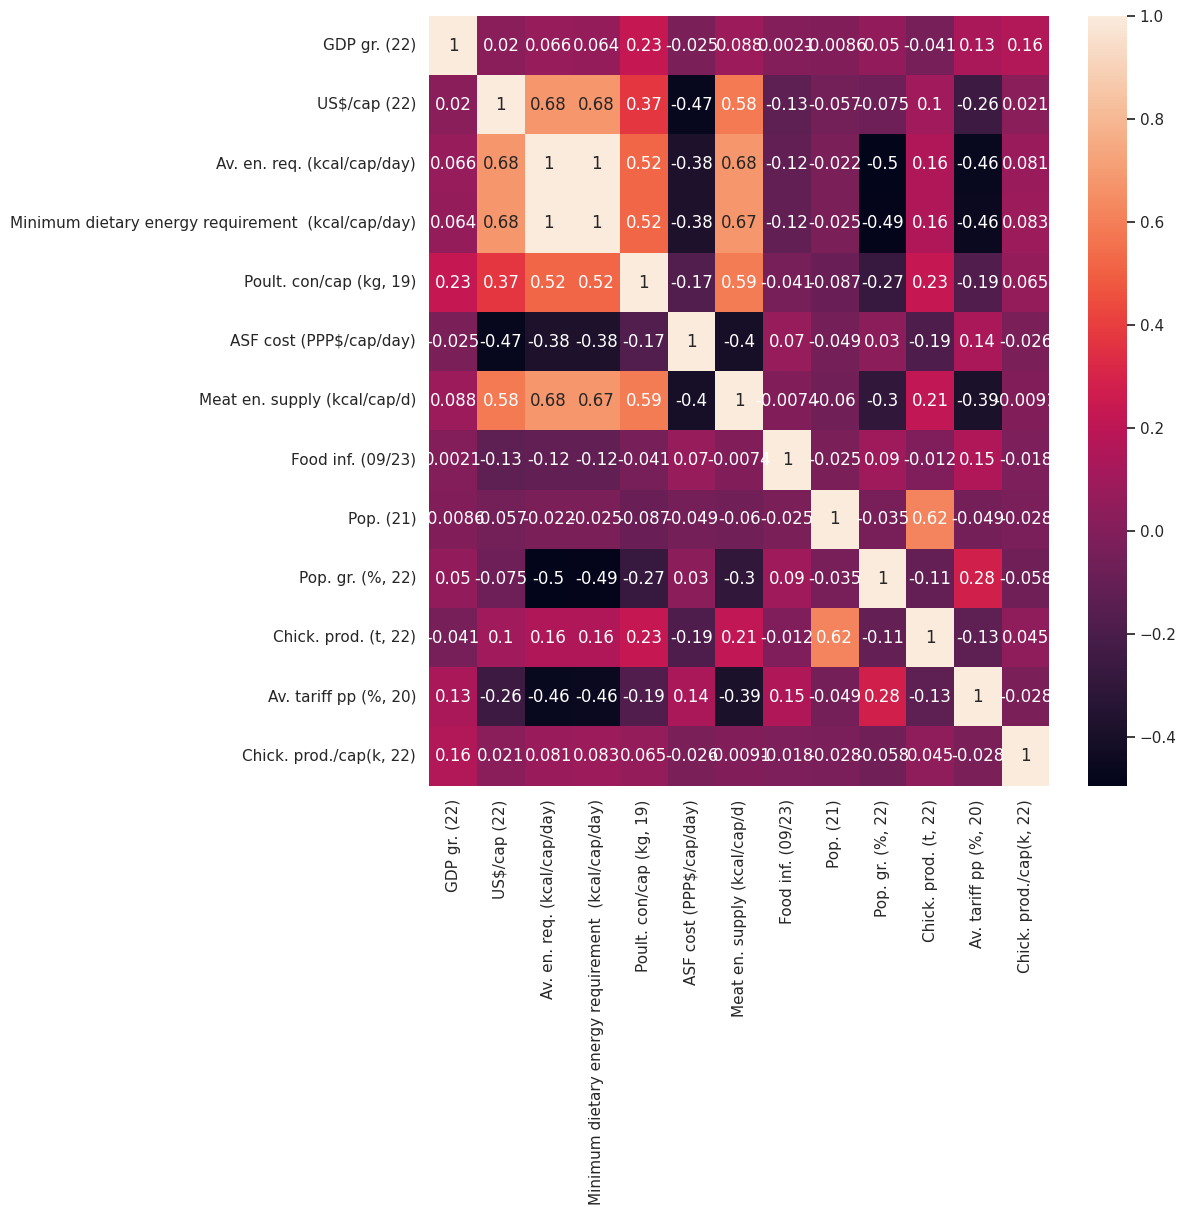

In [11]:
#vérification préalable des corrélations entre les variables
fig = plt.figure(figsize= (10, 10))
sns.heatmap(df.corr(), annot=True)
#corrélation de 1 entre Average et Minimum dietary energy requirement
#population totalement décorellée des autres variables
#0.67 de corrélation entre besoins énergetiques et apports en énergie par la viande
#0.68 entre PIB/hab et besoins énergetiques

In [12]:
#si nécessaire, sélectionner seulement certaines colonnes
#on supprime la colonne corrélée à 100%
cols = ["Minimum dietary energy requirement  (kcal/cap/day)"]
df = df.drop(columns=cols)
#(optionnel) on supprime les colonnes avec beaucoup d'outliers qui écrasent les données (cf précédent notebook préparatoire)
cols = ["Chick. prod. (t, 22)", "Pop. (21)", "Food inf. (09/23)"]
df = df.drop(columns=cols)
#(optionnel) on supprime les colonnes avec quelques outliers qui écrasent les données (cf précédent notebook préparatoire)
cols = ["US$/cap (22)", "GDP gr. (22)"]
df = df.drop(columns=cols)
#(optionnel) on supprime la ligne "Maldives" qui a une prod. de poulet par habitant démesurée (cf précédent notebook préparatoire)
df = df.drop('Maldives')
#(optionnel) on supprime la ligne "Ukraine" qui a une population growth excessivement basse (cf précédent notebook préparatoire)
df = df.drop('Ukraine')
df[:10]

,Av. en. req. (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),"Pop. gr. (%, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)"
country,,,,,,,
Albania,2487,12.340000,1.204,263,-1.215790,2.21,5.7
Algeria,2290,6.560000,0.964,96,1.628339,9.84,6.2
Angola,2127,9.700000,1.011,106,3.096753,14.18,1.7
Antigua and Barbuda,2464,21.193427,0.682,349,0.581876,13.90,0.9
Argentina,2436,45.160000,0.669,601,0.925835,1.54,51.2
Armenia,2417,19.620000,0.973,324,-0.377102,2.04,4.3
Australia,2492,48.910000,0.458,466,1.238639,0.69,52.5
Austria,2531,15.700000,0.612,339,0.956288,0.00,92.5
Azerbaijan,2414,14.270000,0.729,200,0.039508,4.57,12.6


### **2.3. Cleaning**

In [13]:
#si besoin remplacer les valeurs manquantes par les valeurs moyennes
#df = df.fillna(df.mean())
#df.isna().mean()

### **2.4. Data Split**

In [14]:
#on isole la matrice des données
X = df.values
X[:5]

array([[ 2.48700000e+03,  1.23400000e+01,  1.20400000e+00,
         2.63000000e+02, -1.21579032e+00,  2.21000000e+00,
         5.70000000e+00],
       [ 2.29000000e+03,  6.56000000e+00,  9.64000000e-01,
         9.60000000e+01,  1.62833925e+00,  9.84000000e+00,
         6.20000000e+00],
       [ 2.12700000e+03,  9.70000000e+00,  1.01100000e+00,
         1.06000000e+02,  3.09675267e+00,  1.41800000e+01,
         1.70000000e+00],
       [ 2.46400000e+03,  2.11934266e+01,  6.82000000e-01,
         3.49000000e+02,  5.81875833e-01,  1.39000000e+01,
         9.00000000e-01],
       [ 2.43600000e+03,  4.51600000e+01,  6.69000000e-01,
         6.01000000e+02,  9.25835474e-01,  1.54000000e+00,
         5.12000000e+01]])

In [15]:
X.shape

(148, 7)

In [16]:
#on enregistre tous les noms de pays
names = df.index
names

Index(['Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'Turkey', 'UK', 'USA', 'Uganda', 'United Arab Emirates', 'Uruguay',
       'Uzbekistan', 'Viet Nam', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=148)

In [17]:
#on enregistre tous les noms de variables
features = df.columns
features

Index(['Av. en. req. (kcal/cap/day)', 'Poult. con/cap (kg, 19)',
       'ASF cost (PPP$/cap/day)', 'Meat en. supply (kcal/cap/d)',
       'Pop. gr. (%, 22)', 'Av. tariff pp (%, 20)', 'Chick. prod./cap(k, 22)'],
      dtype='object')

## **3. PCA**

### **3.1. Scaling**

In [18]:
#on scale les données
scaler = StandardScaler()

In [19]:
#on fit
scaler.fit(X)

StandardScaler()

In [20]:
#on transforme
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[ 8.89419770e-01, -5.73876791e-01,  1.58892864e+00,
         1.11004187e-01, -1.78149698e+00, -5.27719446e-01,
        -6.94456026e-01],
       [-6.90542627e-01, -9.48438584e-01,  4.27293974e-01,
        -1.05796875e+00,  4.73328805e-01,  6.81635833e-01,
        -6.66827131e-01],
       [-1.99782116e+00, -7.44956918e-01,  6.54780764e-01,
        -9.87970370e-01,  1.63748689e+00,  1.36952599e+00,
        -9.15487192e-01],
       [ 7.04957155e-01, -1.47494060e-04, -9.37626763e-01,
         7.12990250e-01, -3.56307343e-01,  1.32514598e+00,
        -9.59693425e-01],
       [ 4.80393972e-01,  1.55296024e+00, -1.00054864e+00,
         2.47694941e+00, -8.36161567e-02, -6.33914470e-01,
         1.81977348e+00]])

In [21]:
#on espère avoir une moyenne de 0 et une deviation de 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### **3.2. PCA**

In [22]:
#on définit le nbr de composantes
n_components = 6

In [23]:
#on instancie notre PCA
pca = PCA(n_components=n_components)

In [24]:
#on l'entraine sur notre jeu de données scalé
pca.fit(X_scaled)

PCA(n_components=6)

### **3.3. Explained variance and scree splot**

In [25]:
#cherchons à savoir quels sont les eigenvalues de chaque composante
cov_mat = np.cov(X_scaled.T)

# From this covariance matrix, caluclate the Eigenvalues and the Eigenvectors
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

# print the Eigenvalues
print("Raw Eigenvalues: \n", eigen_vals)
# the sum of the Eigenvalues
print("Percentage of Variance Explained by Each Component: \n", eigen_vals/sum(eigen_vals))

#nombre de composantes à prendre en comptes selon règle de Kaiser : eigenvalue > 1
#source : https://statisticsglobe.com/choose-optimal-number-components-pca

Raw Eigenvalues: 
 [3.43669424 1.07681255 0.97296787 0.63016148 0.21710521 0.28164876
 0.43222893]
Percentage of Variance Explained by Each Component: 
 [0.48763905 0.15279097 0.13805625 0.08941481 0.03080547 0.03996368
 0.06132978]


In [26]:
#Intéressons nous maintenant à la variance captée par chaque nouvelle composante
pca.explained_variance_ratio_

array([0.48763905, 0.15279097, 0.13805625, 0.08941481, 0.06132978,
       0.03996368])

In [27]:
#Enregistrons cela dans une variable :
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([48.76, 15.28, 13.81,  8.94,  6.13,  4.  ])

In [28]:
#on définit le même array en cumulé
scree_cum = scree.cumsum().round()
scree_cum

array([49., 64., 78., 87., 93., 97.])

In [29]:
#Définisons ensuite une variable avec la liste de nos composantes :
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

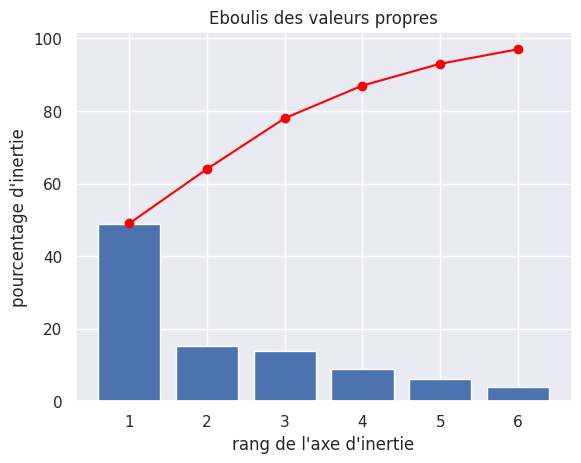

In [30]:
#illustration graphique
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

### **3.4. Components**

In [31]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,-0.464222,-0.409162,0.243849,-0.456926,0.357891,0.281657,-0.376064
1,-0.215286,0.359743,-0.299019,0.031705,0.403290,0.592339,0.469374
2,-0.102159,0.346675,0.804672,-0.130176,-0.324724,0.183018,0.256899
3,0.270123,-0.194221,-0.189313,-0.010583,-0.558515,0.694352,-0.243511
4,-0.156603,-0.269843,-0.276355,-0.598681,-0.357228,-0.193369,0.550333
5,-0.443945,-0.518424,0.106594,0.642963,-0.151757,0.046263,0.290197


In [32]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Av. en. req. (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),"Pop. gr. (%, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)"
F1,-0.46,-0.41,0.24,-0.46,0.36,0.28,-0.38
F2,-0.22,0.36,-0.30,0.03,0.40,0.59,0.47
F3,-0.10,0.35,0.80,-0.13,-0.32,0.18,0.26
F4,0.27,-0.19,-0.19,-0.01,-0.56,0.69,-0.24
F5,-0.16,-0.27,-0.28,-0.60,-0.36,-0.19,0.55
F6,-0.44,-0.52,0.11,0.64,-0.15,0.05,0.29


<Axes: >

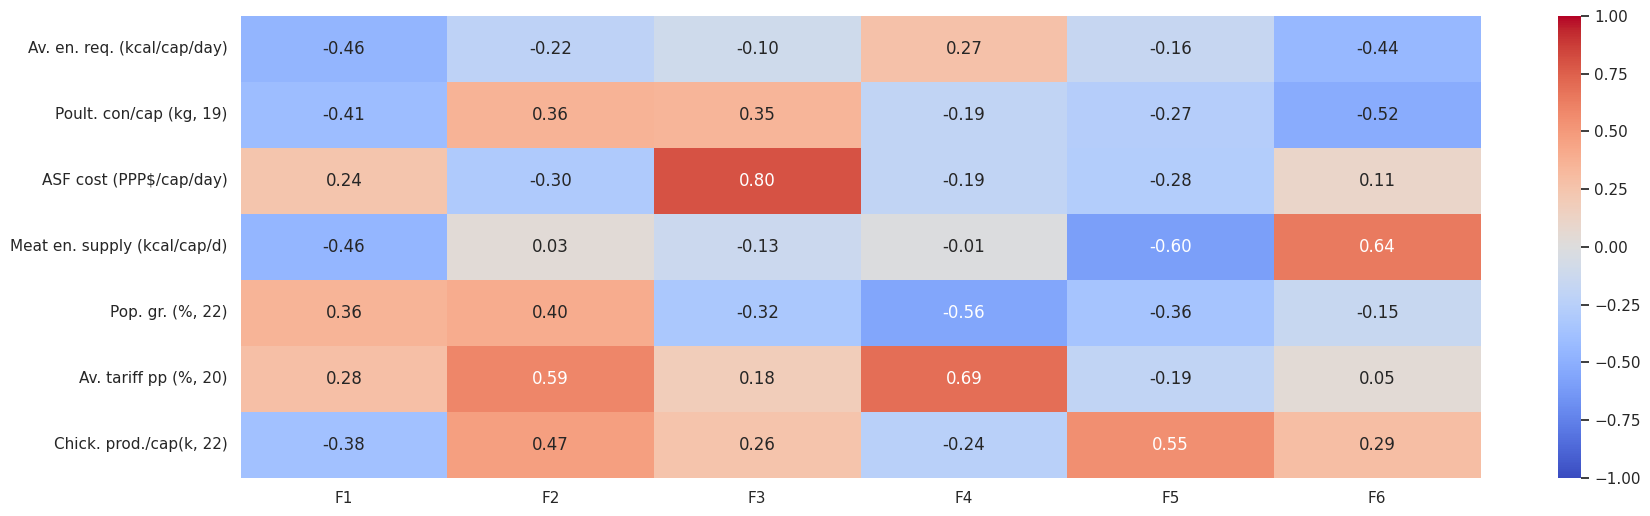

In [33]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

### **3.5. Correlation graph**

In [34]:
#Définissons nos axes x et y. Nous allons utiliser les 2 premières composantes. Comme - en code - on commence à compter à partir de 0, cela nous donne :
x, y = 0,1

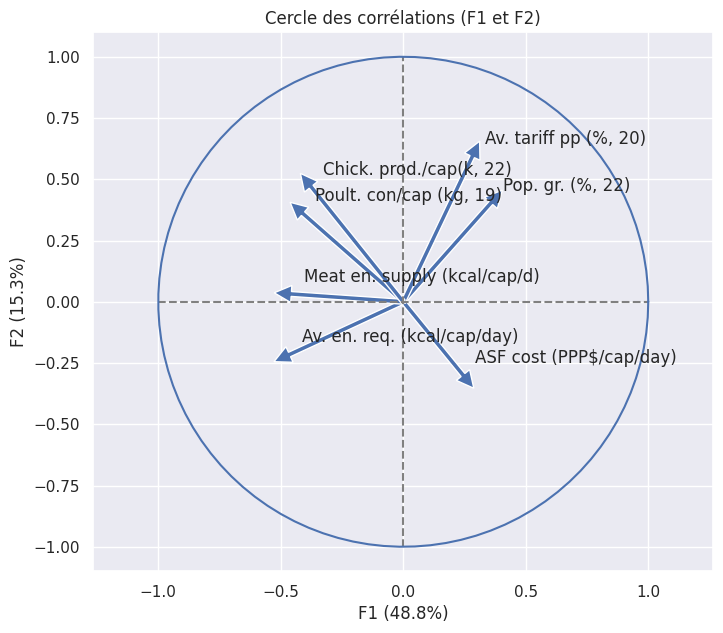

In [35]:
fig, ax = plt.subplots(figsize=(8, 7))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07,
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])

# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [36]:
#on peut en faire une fonction
def correlation_graph(pca,
                      x_y,
                      features) :
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.07,
                head_length=0.07,
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

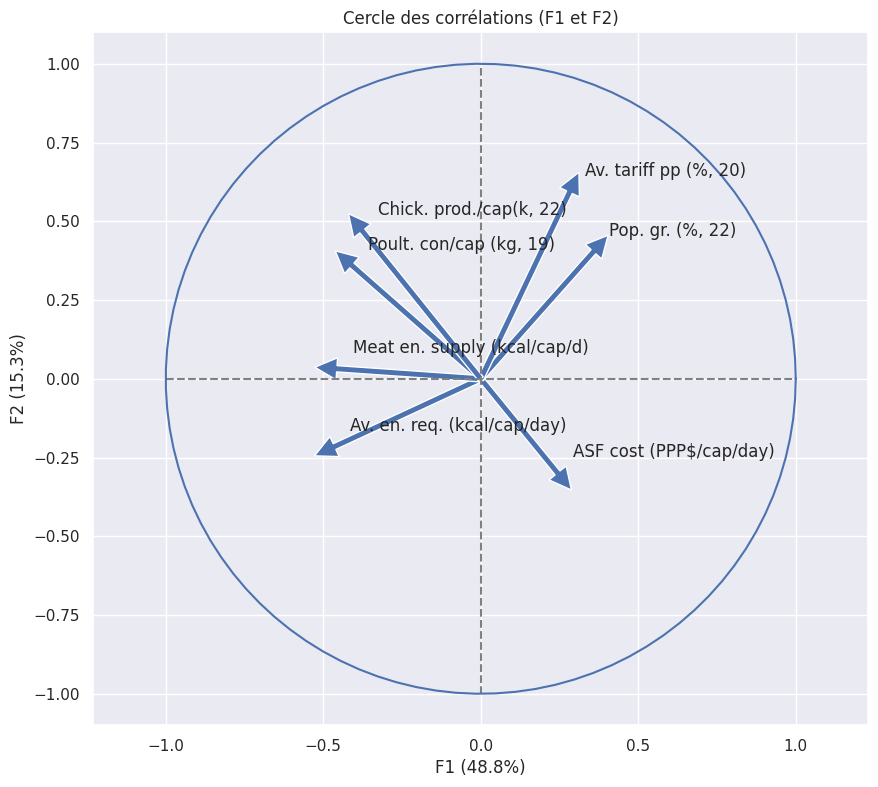

In [37]:
#essai sur F1 et F2
x_y = (0,1)
correlation_graph(pca, x_y, features)

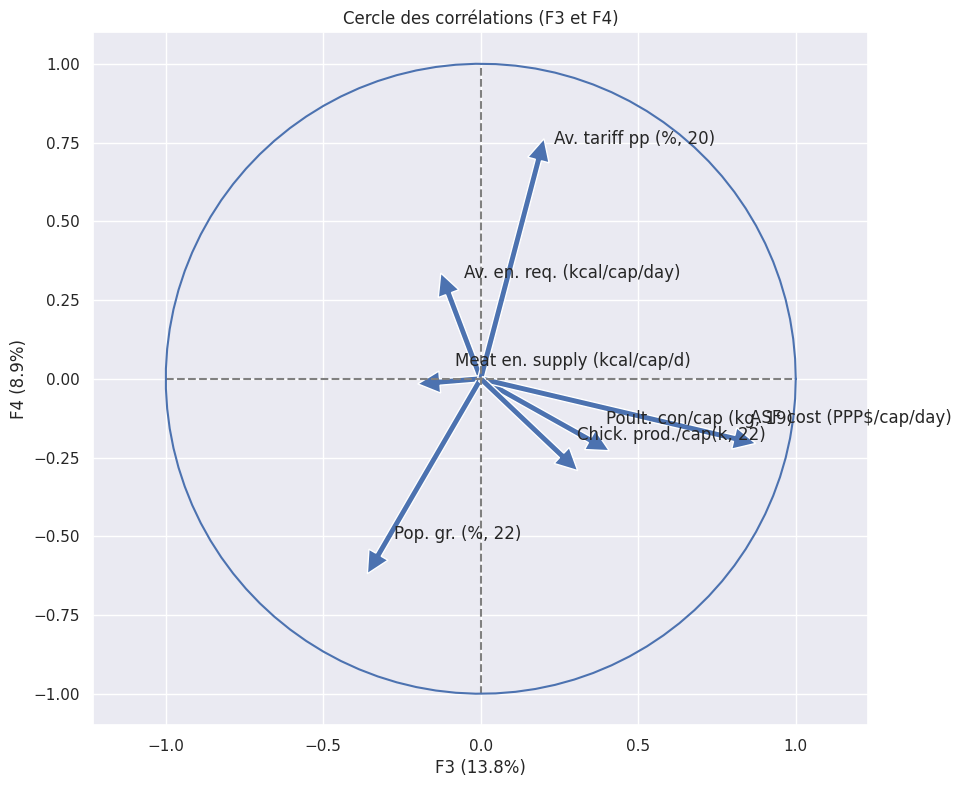

In [38]:
#test sur F2 et F4
correlation_graph(pca, (2,3), features)

### **3.6. Projection**

In [39]:
#calculons les coordonnées de nos individus dans le nouvel espace :
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-0.36639842, -2.2265355 ,  1.27781208,  0.84740895, -0.13372948,
         0.18781114],
       [ 1.90839626, -0.07218554,  0.02304271,  0.29929265,  0.21150117,
        -0.0702392 ],
       [ 3.15939689,  0.97689273,  0.08506108, -0.24917103, -0.42918976,
         0.25688026],
       [-0.27499641,  0.34193817, -0.80768253,  1.71322897, -0.93520347,
        -0.11752772],
       [-3.12701124,  1.27790057, -0.25962599, -0.84524135, -0.54675211,
         0.97902995]])

In [40]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

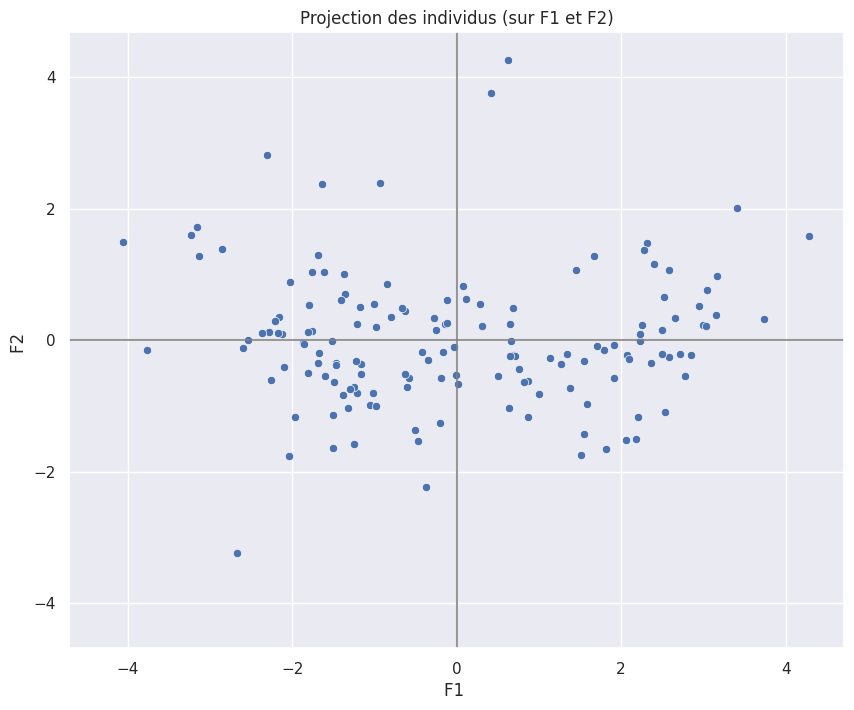

In [41]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)
#si besoin rajouter une variable : display_factorial_planes(X_proj, x_y, clusters=df['Pop. (21)'])

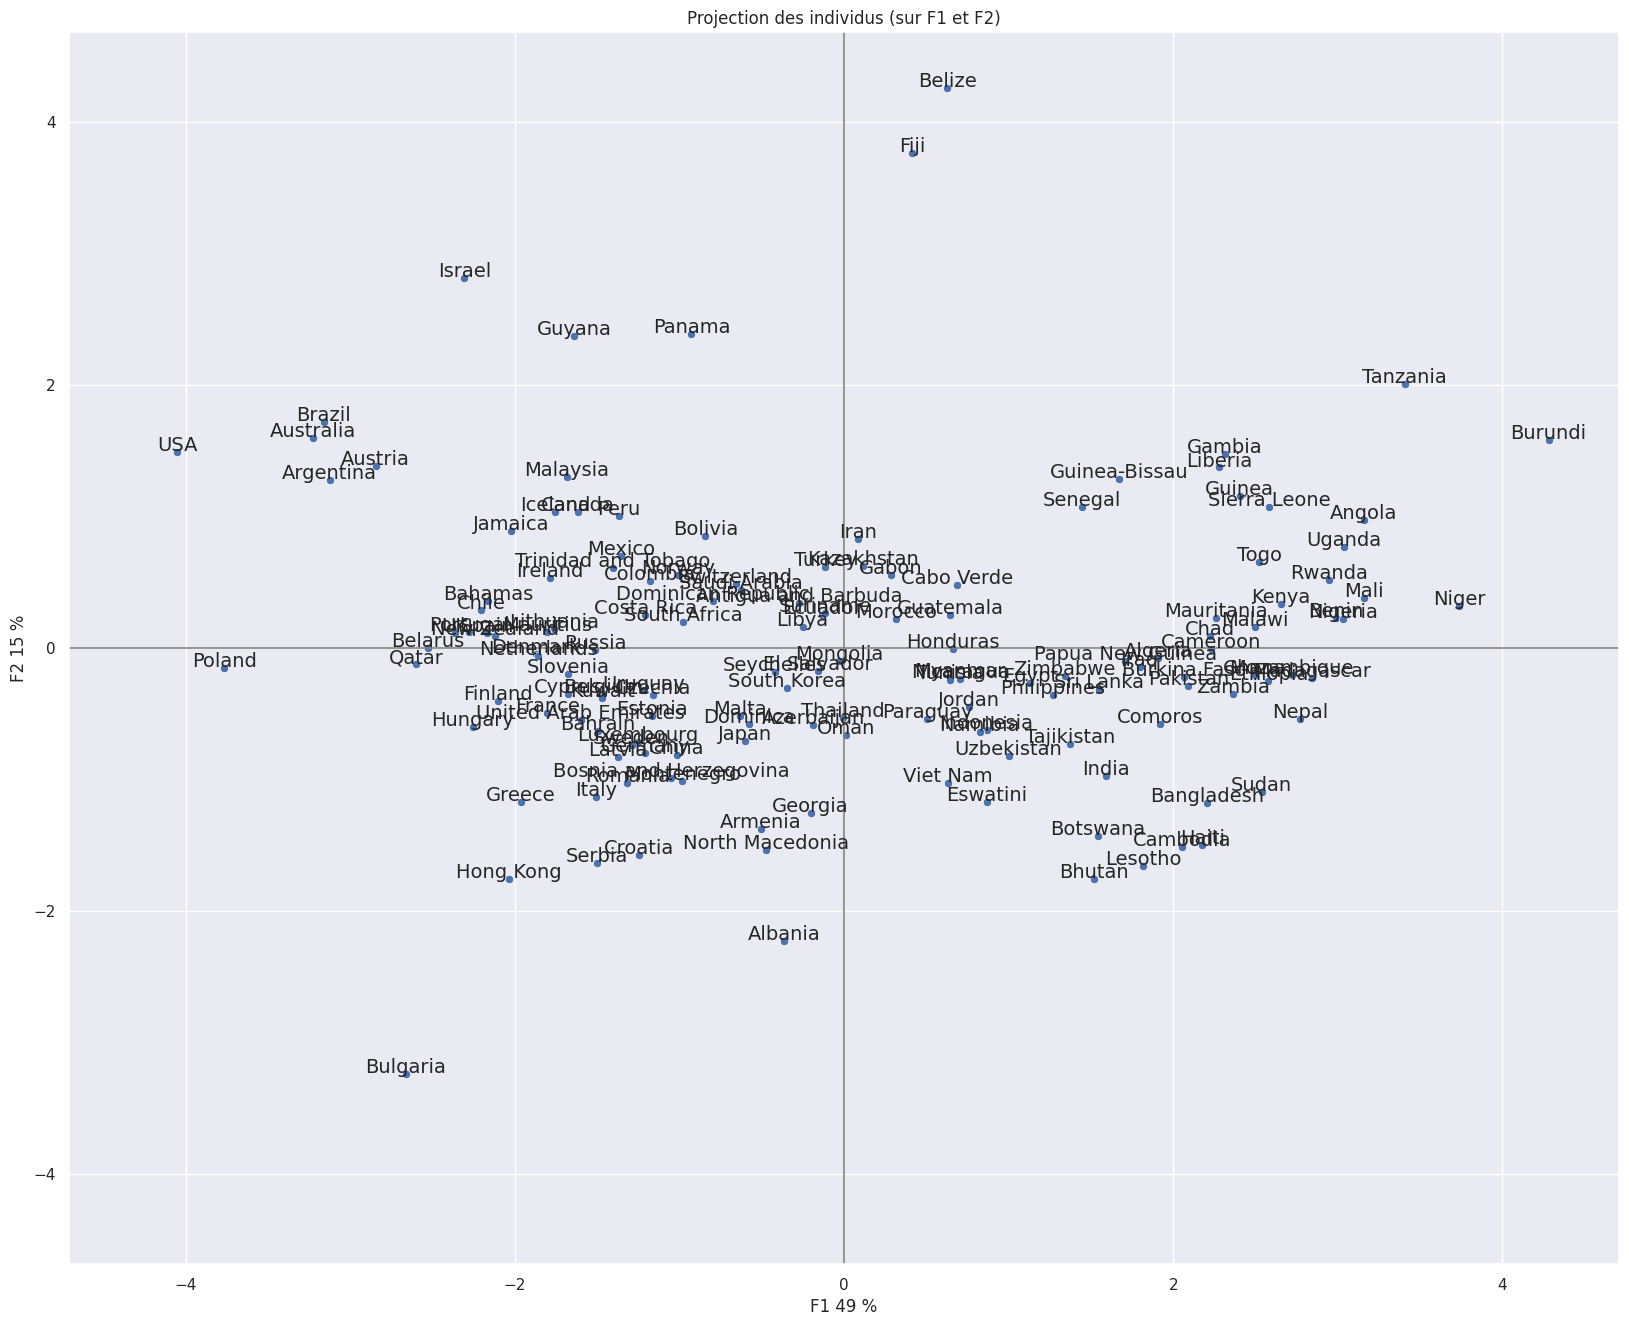

In [42]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), marker="o")
#si besoin rajouter une variable : display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,16), clusters=df['Pop. (21)'], marker="o")

# **II. Clustering**

## **1. K-means**

In [331]:
#Chargeons les librairies graphiques
sns.set()

In [332]:
#on charge le df
#Enregistrons ce dataframe dans une variable temporaire tmp
tmp = pd.read_excel("data.xlsx", index_col=0)
tmp = tmp[features]
tmp = tmp.loc[tmp.index.isin(names),]

In [333]:
#on instancie notre estimateur
kmeans = KMeans(n_clusters=3)

In [334]:
#on l'entraine
kmeans.fit(tmp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [335]:
#on calcule l'inertie
kmeans.inertia_

1381922.3566698409

### **Méthode du coude**

In [336]:
#on définit le nombre de clusters que l'on veut tester
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [337]:
#Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
intertia = []
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tmp)
    intertia.append(kmeans.inertia_)
intertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[5411309.463453217,
 2024096.015023679,
 1383474.4605543185,
 1085995.5636916854,
 878872.7393716826,
 711562.9194605905,
 591706.3168333303,
 531946.3536203313,
 462749.0631903708]

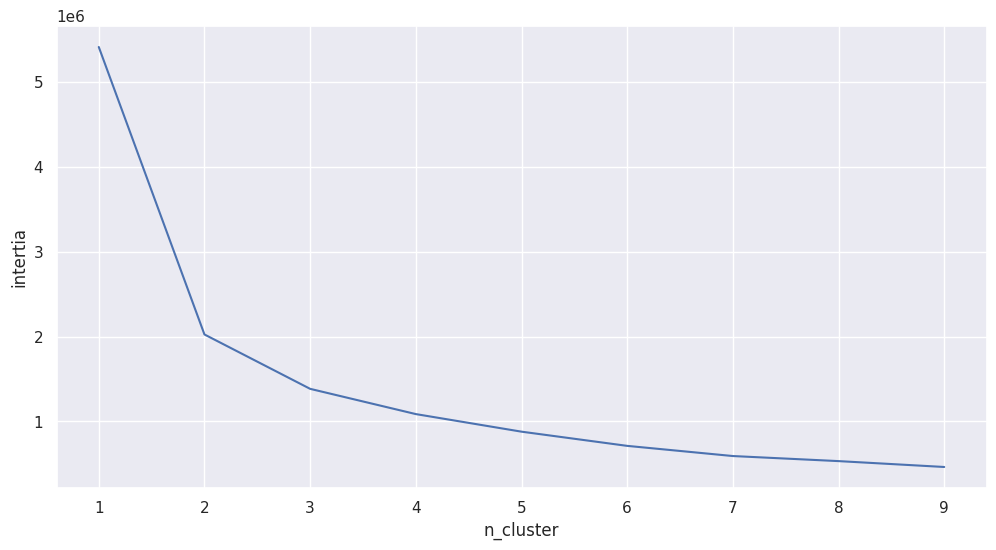

In [338]:
#on affiche le résultat
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

### **Création des clusters**

In [339]:
#Regardons maintenant les clusters que nous avons obtenus.
#Nous devons d'abord ré-entrainer un estimateur:
n_clusters=3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(tmp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [340]:
#voici les clusters
labels = kmeans.labels_

In [341]:
tmp["cluster"] = labels+1

In [342]:
#afficher graphiquement :sns.pairplot(tmp, hue="cluster")
tmp

,Av. en. req. (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),"Pop. gr. (%, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)",cluster
country,,,,,,,,
Albania,2487,12.340000,1.204000,263,-1.215790,2.21,5.7,2
Algeria,2290,6.560000,0.964000,96,1.628339,9.84,6.2,1
Angola,2127,9.700000,1.011000,106,3.096753,14.18,1.7,1
Antigua and Barbuda,2464,21.193427,0.682000,349,0.581876,13.90,0.9,3
Argentina,2436,45.160000,0.669000,601,0.925835,1.54,51.2,3
...,...,...,...,...,...,...,...,...
Uruguay,2431,21.060000,0.615000,295,-0.101211,1.91,21.8,2
Uzbekistan,2349,2.740000,0.875922,241,2.077645,1.15,4.4,2
Viet Nam,2297,13.900000,1.183000,297,0.734794,2.66,10.9,2


In [343]:
#longueur de chaque cluster
for i in tmp['cluster'].unique():
    print('La longueur du cluster {} est de {} pays.'.format(i, len(tmp[tmp['cluster']==i])))

La longueur du cluster 2 est de 44 pays.
La longueur du cluster 1 est de 54 pays.
La longueur du cluster 3 est de 50 pays.


In [373]:
#quels sont les clusters ?
for i in range(1, n_clusters+1) :
     # on fait une selection
    sub_df = tmp.loc[tmp.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms de chaque ligne
    names_list = sub_df.index

    # on créé une liste de couple nom/theme
    ziped = zip(names_list)
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)

    # on print
    print(txt)
    print("\n")

cluster : 1
('Algeria',) / ('Angola',) / ('Bangladesh',) / ('Benin',) / ('Bhutan',) / ('Botswana',) / ('Burkina Faso',) / ('Burundi',) / ('Cambodia',) / ('Cameroon',) / ('Chad',) / ('Comoros',) / ('Egypt',) / ('El Salvador',) / ('Eswatini',) / ('Ethiopia',) / ('Gambia',) / ('Ghana',) / ('Guatemala',) / ('Guinea',) / ('Guinea-Bissau',) / ('Haiti',) / ('Honduras',) / ('India',) / ('Indonesia',) / ('Iraq',) / ('Kenya',) / ('Lesotho',) / ('Liberia',) / ('Madagascar',) / ('Malawi',) / ('Mali',) / ('Mauritania',) / ('Mozambique',) / ('Myanmar',) / ('Namibia',) / ('Nepal',) / ('Nicaragua',) / ('Niger',) / ('Nigeria',) / ('Pakistan',) / ('Papua New Guinea',) / ('Philippines',) / ('Rwanda',) / ('Senegal',) / ('Sierra Leone',) / ('Sri Lanka',) / ('Sudan',) / ('Tajikistan',) / ('Tanzania',) / ('Togo',) / ('Tunisia',) / ('Uganda',) / ('Zambia',)


cluster : 2
('Albania',) / ('Armenia',) / ('Azerbaijan',) / ('Belize',) / ('Bolivia',) / ('Bosnia and Herzegovina',) / ('Bulgaria',) / ('Cabo Verde',) /

### **Caractérisation des clusters**

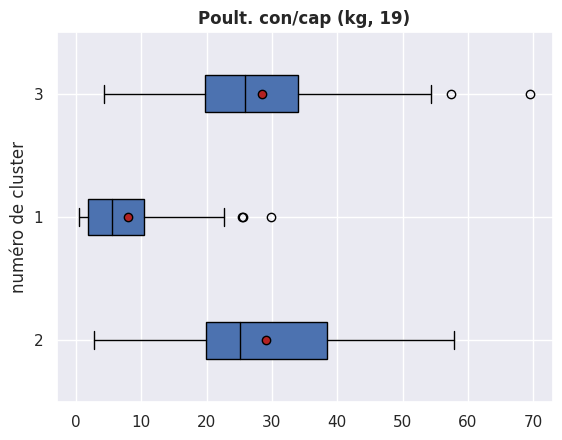

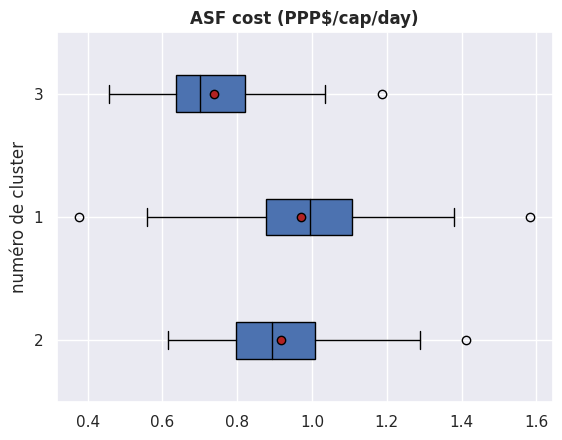

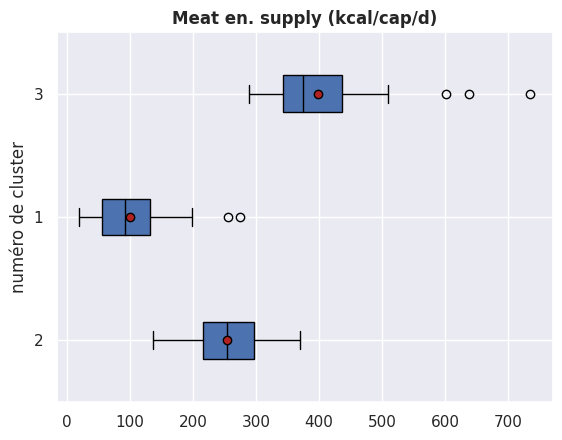

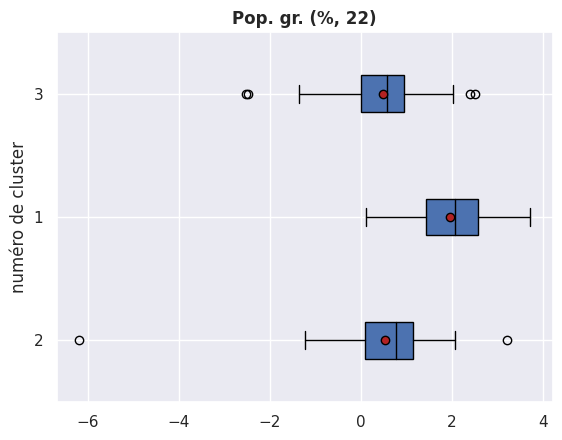

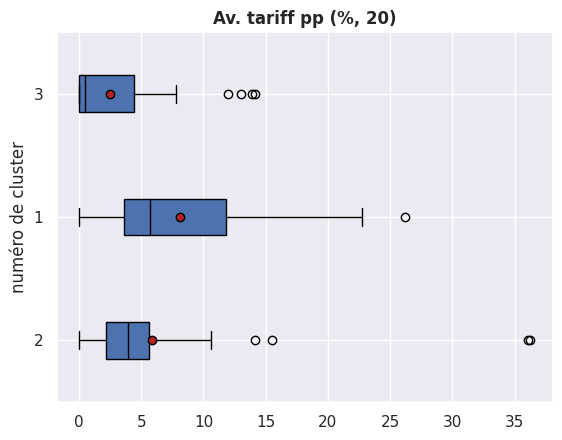

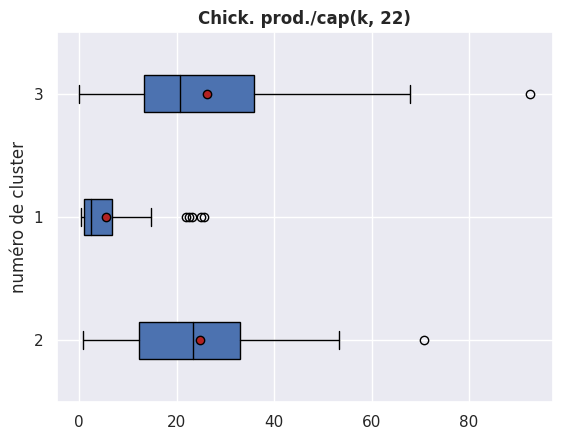

In [378]:
#boxplot pour chaque variable et chaque cluster
modalites = tmp['cluster'].unique()

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for a in tmp.columns[1:len(tmp.columns)-1]:
    groupes = []
    for m in modalites:
        groupes.append(tmp[tmp['cluster']==m][a])
    plt.boxplot(groupes, vert=False, labels=modalites, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(a, fontweight='bold')
    plt.ylabel('numéro de cluster')
    plt.show()

In [374]:
#dataframe avec les centroides, source : https://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.html
sub_tmp = tmp.groupby('cluster').agg({i: 'mean' for i in tmp.columns})
sub_tmp = sub_tmp.drop('cluster', axis=1)
df_clusters_kmeans = sub_tmp.transpose().apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=1)
df_clusters_kmeans

<ipython-input-374-3a1e8e79415e>:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_clusters_kmeans = sub_tmp.transpose().apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=1)


cluster,1,2,3
Av. en. req. (kcal/cap/day),2247.5,2392.4,2500.7
"Poult. con/cap (kg, 19)",8.0,29.1,28.5
ASF cost (PPP$/cap/day),1.0,0.9,0.7
Meat en. supply (kcal/cap/d),100.4,254.6,399.0
"Pop. gr. (%, 22)",1.9,0.5,0.5
"Av. tariff pp (%, 20)",8.1,5.9,2.5
"Chick. prod./cap(k, 22)",5.5,24.9,26.3


## **2. Classification ascendante hiérarchique**

### **1. Preliminary**

In [347]:
sns.set()

In [348]:
#on charge le df et on sélectionne les colonnes/lignes qu'on veut garder
#Enregistrons ce dataframe dans une variable temporaire df_ascendant
df_ascendant = pd.read_excel("data.xlsx", index_col=0)
df_ascendant = df_ascendant[features]
df_ascendant = df_ascendant.loc[df_ascendant.index.isin(names),]

In [349]:
df_ascendant.shape

(148, 7)

In [350]:
#Commencons par sélectionner les colonnes de data
cols = df_ascendant.columns

### **2. Clustering (data preparation effectué en PCA)**

In [351]:
#Grace à la méthode describe, on confirme que la moyenne est à 0 et l'écart-type à 1:
pd.DataFrame(X_scaled).describe().round(2).iloc[1:3:, : ]

,0,1,2,3,4,5,6
mean,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**2.1. Linkage**

In [352]:
#Nous allons calculer les distances en spécifiant la méthode à utiliser
Z = linkage(X_scaled, method="ward")
Z[:10]

array([[ 52.        , 130.        ,   0.22624175,   2.        ],
       [ 36.        ,  43.        ,   0.38025833,   2.        ],
       [113.        , 126.        ,   0.39820286,   2.        ],
       [ 75.        , 117.        ,   0.41720799,   2.        ],
       [ 26.        ,  45.        ,   0.44314132,   2.        ],
       [ 25.        ,  78.        ,   0.49285563,   2.        ],
       [ 60.        , 100.        ,   0.53352151,   2.        ],
       [104.        , 131.        ,   0.58342617,   2.        ],
       [ 86.        , 102.        ,   0.61575173,   2.        ],
       [135.        , 151.        ,   0.64619457,   3.        ]])

**2.2. Dendrogram**

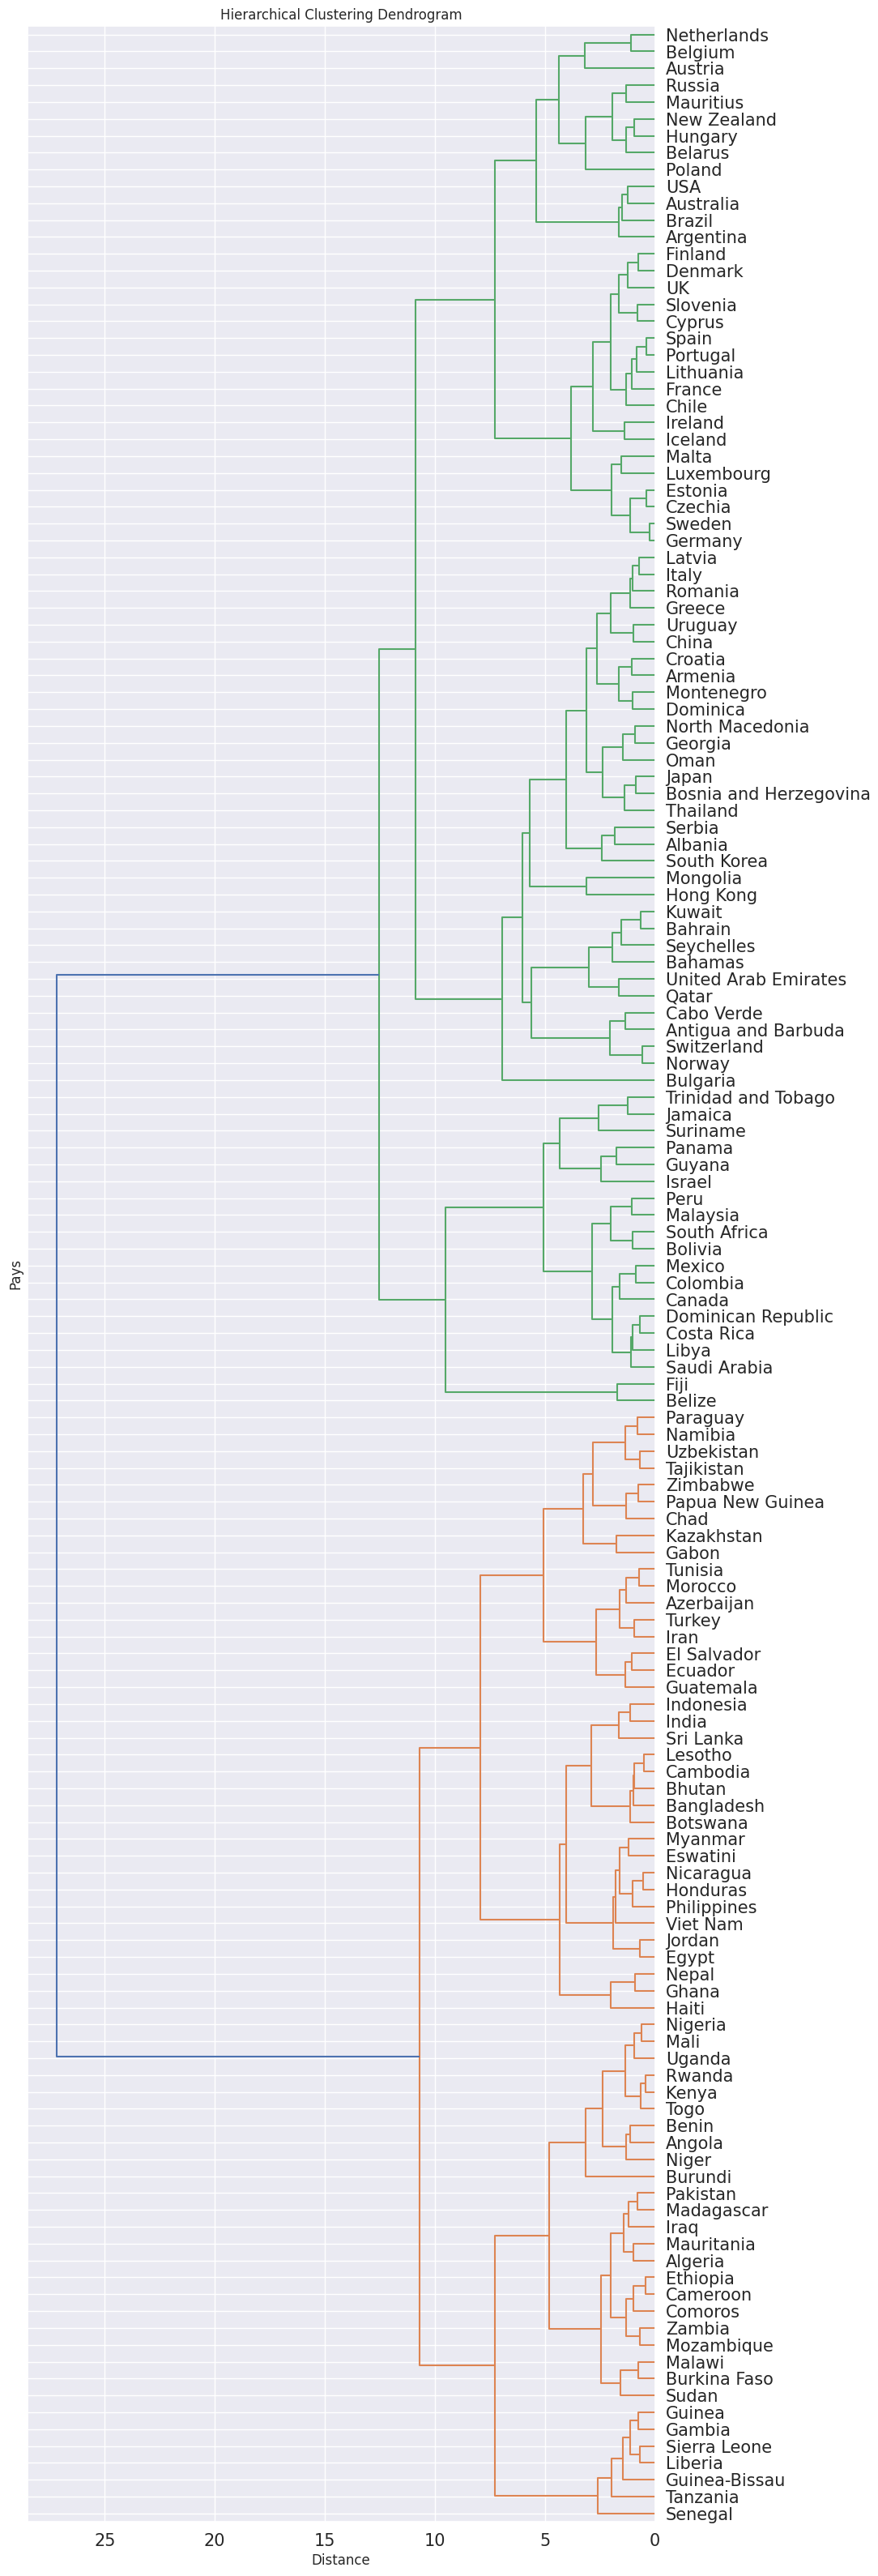

In [353]:
#Nous pouvons désormais affichier le dendrogramme.
#Notez que nous spécifions les labels et l'orientation :
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, p=10, ax=ax, labels=names, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

**2.3. Clusters**

In [354]:
#Ensuite, on définit le nombre de clusters que l'on souhaite:
#à voir pour définir : https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
k=3

In [355]:
#On applique ensuite la fonction fclustersde scipypour définir les clusters :
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 2, 1, 1, 2, 3, 1, 3, 3,
       1, 1, 3, 1, 1, 2, 1, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 2, 1, 1, 1, 3,
       1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 2, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 2, 3, 2, 3, 1, 1, 1, 3, 3, 1, 1, 2, 3, 3, 1, 1, 2, 1, 3,
       1, 3, 2, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1,
       2, 1, 3, 3, 3, 3, 3, 1, 2, 1, 3, 3, 1, 3, 2, 3, 3, 1, 1, 2, 3, 3,
       1, 1, 3, 1, 2, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1], dtype=int32)

**2.4. Analysis**

In [356]:
#!pip install pycountry
#import pycountry_convert as pc

In [357]:
#Nous allons maintenant analyser la pertinence de notre clustering.
#Pour cela, il nous faut une table de contingence .
#Nous l'obtenons grace à la fonction crosstab de pandas.
#crosstab = pd.crosstab(continents, clusters, dropna=False)
#crosstab.rename_axis(columns="cluster", index="continent", inplace=True)
#crosstab
#df_ascendant_cont = df_ascendant.reset_index(drop=False)
#countries = list(df_ascendant_cont['country'])
#def country_to_continent(country_name):
    #country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    #country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    #country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    #return country_continent_name
#continents = [[country_to_continent(c)for c in countries]]

In [358]:
#Nous avons notre table de contingence, mais une petite touche "graphique" ne ferait pas de mal!
#C'est possible gràce à la fonction heatmap de seaborn.
#fig, ax = plt.subplots(1,1, figsize=(12,6))
#ax = sns.heatmap(crosstab, vmin=0.1, vmax=14, annot=True, cmap="Purples")

In [359]:
#Enfin et pour finir nous pouvons afficher les pays pour chaque cluster :
df_ascendant['cluster'] = clusters
df_ascendant

,Av. en. req. (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),"Pop. gr. (%, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)",cluster
country,,,,,,,,
Albania,2487,12.340000,1.204000,263,-1.215790,2.21,5.7,3
Algeria,2290,6.560000,0.964000,96,1.628339,9.84,6.2,1
Angola,2127,9.700000,1.011000,106,3.096753,14.18,1.7,1
Antigua and Barbuda,2464,21.193427,0.682000,349,0.581876,13.90,0.9,3
Argentina,2436,45.160000,0.669000,601,0.925835,1.54,51.2,3
...,...,...,...,...,...,...,...,...
Uruguay,2431,21.060000,0.615000,295,-0.101211,1.91,21.8,3
Uzbekistan,2349,2.740000,0.875922,241,2.077645,1.15,4.4,1
Viet Nam,2297,13.900000,1.183000,297,0.734794,2.66,10.9,1


In [360]:
for i in range(1, k+1) :
    # on fait une selection
    sub_df = df_ascendant.loc[df_ascendant.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms de chaque ligne
    names_list = sub_df.index

    # on créé une liste de couple nom/theme
    ziped = zip(names_list)
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)

    # on print
    print(txt)
    print("\n")

cluster : 1
('Algeria',) / ('Angola',) / ('Azerbaijan',) / ('Bangladesh',) / ('Benin',) / ('Bhutan',) / ('Botswana',) / ('Burkina Faso',) / ('Burundi',) / ('Cambodia',) / ('Cameroon',) / ('Chad',) / ('Comoros',) / ('Ecuador',) / ('Egypt',) / ('El Salvador',) / ('Eswatini',) / ('Ethiopia',) / ('Gabon',) / ('Gambia',) / ('Ghana',) / ('Guatemala',) / ('Guinea',) / ('Guinea-Bissau',) / ('Haiti',) / ('Honduras',) / ('India',) / ('Indonesia',) / ('Iran',) / ('Iraq',) / ('Jordan',) / ('Kazakhstan',) / ('Kenya',) / ('Lesotho',) / ('Liberia',) / ('Madagascar',) / ('Malawi',) / ('Mali',) / ('Mauritania',) / ('Morocco',) / ('Mozambique',) / ('Myanmar',) / ('Namibia',) / ('Nepal',) / ('Nicaragua',) / ('Niger',) / ('Nigeria',) / ('Pakistan',) / ('Papua New Guinea',) / ('Paraguay',) / ('Philippines',) / ('Rwanda',) / ('Senegal',) / ('Sierra Leone',) / ('Sri Lanka',) / ('Sudan',) / ('Tajikistan',) / ('Tanzania',) / ('Togo',) / ('Tunisia',) / ('Turkey',) / ('Uganda',) / ('Uzbekistan',) / ('Viet Nam',)

**2.5. Caractérisation des clusters**

In [361]:
#longueur de chaque cluster
for i in df_ascendant['cluster'].unique():
    print('La longueur du cluster {} est de {} pays.'.format(i, len(df_ascendant[df_ascendant['cluster']==i])))

La longueur du cluster 3 est de 63 pays.
La longueur du cluster 1 est de 66 pays.
La longueur du cluster 2 est de 19 pays.


In [362]:
#dataframe avec les centroides
sub_ascendant = df_ascendant.groupby('cluster').agg({i: 'mean' for i in df_ascendant.columns})
sub_ascendant = sub_ascendant.drop('cluster', axis=1)
df_clusters_ascendant = sub_ascendant.transpose().apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=1)
df_clusters_ascendant

<ipython-input-362-3c83f0458d02>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_clusters_ascendant = sub_ascendant.transpose().apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=1)


cluster,1,2,3
Av. en. req. (kcal/cap/day),2264.8,2375.6,2492.8
"Poult. con/cap (kg, 19)",9.7,44.0,26.3
ASF cost (PPP$/cap/day),1.0,1.0,0.8
Meat en. supply (kcal/cap/d),124.5,290.7,362.5
"Pop. gr. (%, 22)",1.8,0.9,0.2
"Av. tariff pp (%, 20)",7.5,8.5,2.6
"Chick. prod./cap(k, 22)",7.2,41.0,23.0


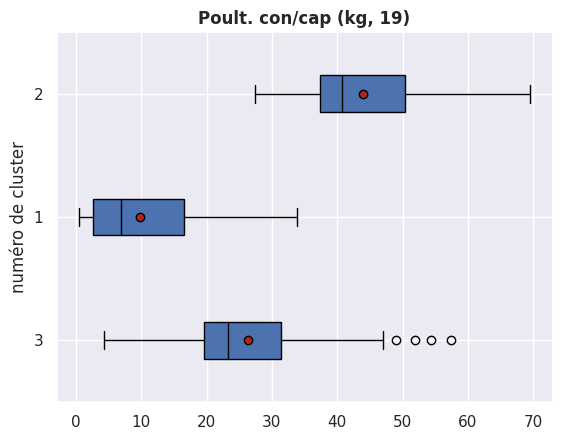

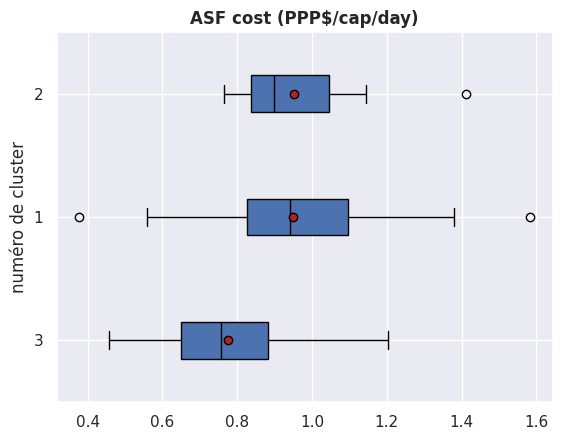

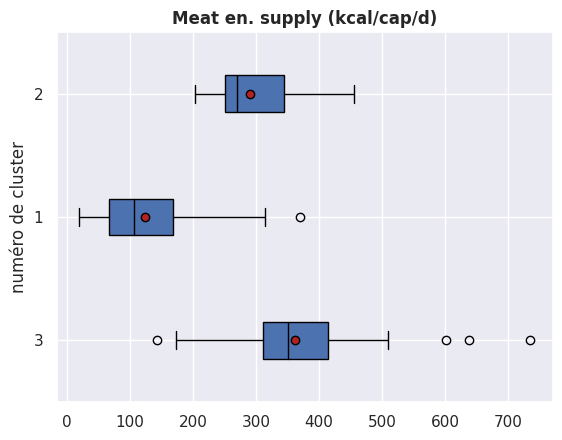

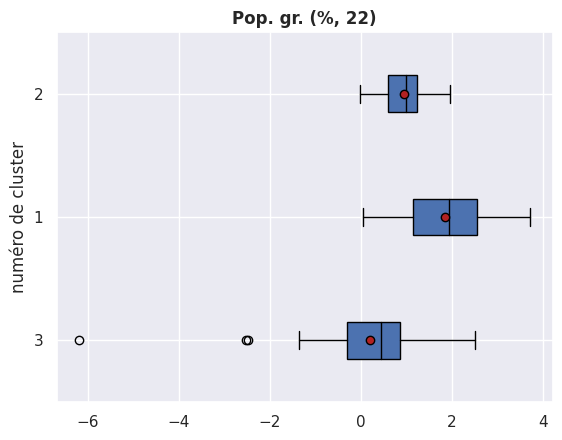

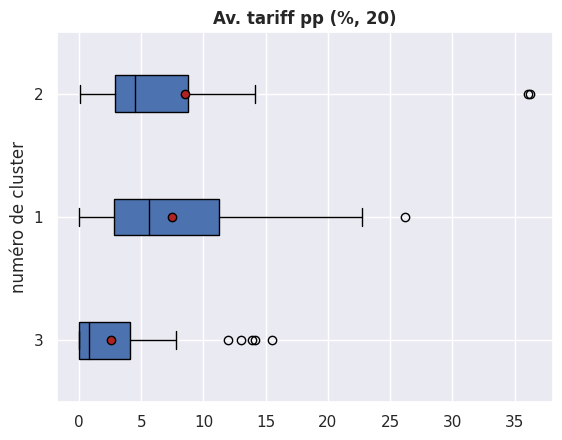

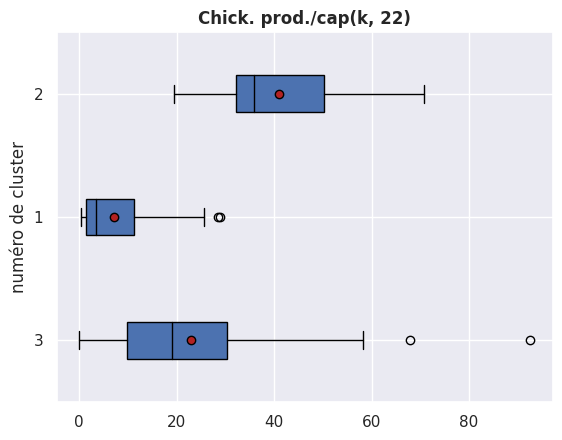

In [363]:
#boxplot pour chaque variable et chaque cluster
modalites = df_ascendant['cluster'].unique()

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for a in df_ascendant.columns[1:len(df_ascendant.columns)-1]:
    groupes = []
    for m in modalites:
        groupes.append(df_ascendant[df_ascendant['cluster']==m][a])
    plt.boxplot(groupes, vert=False, labels=modalites, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(a, fontweight='bold')
    plt.ylabel('numéro de cluster')
    plt.show()

**2.6 Comparaison des résultats en k-means et classification ascendante hiérarchique**

In [364]:
#on essaye de comparer les clusters obtenus en tmp (k-means) et df_ascendant (classification ascendante hiérarchique) avec l'overlap
for i in list(tmp['cluster'].unique()):
    for c in list(df_ascendant['cluster'].unique()):
        print('{} % des pays présents dans le cluster {} en k-means sont présents dans le cluster {} en classification hiérarchique.'
        .format(round(len(list(set(tmp.loc[tmp['cluster']==i].index).intersection(df_ascendant[df_ascendant['cluster']==c].index)))*100 / len(tmp.loc[tmp['cluster']==i]),1), i, c))
        print('{} % des pays présents dans le cluster {} en classification hiérarchique sont présents dans le cluster {} en k-means.'
        .format(round(len(list(set(tmp.loc[tmp['cluster']==i].index).intersection(df_ascendant[df_ascendant['cluster']==c].index)))*100 / len(df_ascendant.loc[df_ascendant['cluster']==c]),1), c, i))
        print ("-------")

34.1 % des pays présents dans le cluster 2 en k-means sont présents dans le cluster 3 en classification hiérarchique.
23.8 % des pays présents dans le cluster 3 en classification hiérarchique sont présents dans le cluster 2 en k-means.
-------
27.3 % des pays présents dans le cluster 2 en k-means sont présents dans le cluster 1 en classification hiérarchique.
18.2 % des pays présents dans le cluster 1 en classification hiérarchique sont présents dans le cluster 2 en k-means.
-------
38.6 % des pays présents dans le cluster 2 en k-means sont présents dans le cluster 2 en classification hiérarchique.
89.5 % des pays présents dans le cluster 2 en classification hiérarchique sont présents dans le cluster 2 en k-means.
-------
0.0 % des pays présents dans le cluster 1 en k-means sont présents dans le cluster 3 en classification hiérarchique.
0.0 % des pays présents dans le cluster 3 en classification hiérarchique sont présents dans le cluster 1 en k-means.
-------
100.0 % des pays présents 

In [377]:
#Similarité cosinus is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.
#on crée un df vide avec un nb de clusters kmeans en Y et un bb de clusters clustering hiérarchique en X
df_similarite = pd.DataFrame(index=np.arange(tmp['cluster'].nunique()), columns=np.arange(df_ascendant['cluster'].nunique()))
#les clusters commentcent à 1
for i in range(len(df_ascendant['cluster'].unique())):
    df_similarite = df_similarite.rename(columns={i: str(i+1)})
for i in range(len(tmp['cluster'].unique())):
    df_similarite = df_similarite.rename(index={i: str(i+1)})

import math
from collections import Counter

def counter_pays(a):
    return Counter(a)

def counter_cosine_similarity(c1, c2):
    terms = set(c1).union(c2)
    dotprod = sum(c1.get(k, 0) * c2.get(k, 0) for k in terms)
    magA = math.sqrt(sum(c1.get(k, 0)**2 for k in terms))
    magB = math.sqrt(sum(c2.get(k, 0)**2 for k in terms))
    return dotprod / (magA * magB)

for i in list(tmp['cluster'].unique()):
    for c in list(df_ascendant['cluster'].unique()):
        df_similarite.iloc[i-1,c-1] = round(counter_cosine_similarity(counter_pays(list(tmp.loc[tmp['cluster']==i].index)), counter_pays(list(df_ascendant.loc[df_ascendant['cluster']==c].index)))*100,1)

df_similarite = df_similarite.apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=None)
print("Le graphique affiche la similarité cosinus (%) entre \n les clusters obtenus en k-means (axe Y) et \n les clusters obtenus en clustering hiérarchique (axe X)")
df_similarite

Le graphique affiche la similarité cosinus (%) entre 
 les clusters obtenus en k-means (axe Y) et 
 les clusters obtenus en clustering hiérarchique (axe X)


<ipython-input-377-310a12a32bdd>:27: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_similarite = df_similarite.apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=None)


,1,2,3
1,90.5,0.0,0.0
2,22.3,58.8,28.5
3,0.0,6.5,85.5


In [397]:
#choix de pays à cibler
#plutôt cluster où on a appétence viande (numéro change à chaque fois attention)
#on affiche le rang de chaque variable du plus grand (rang 1) au plutôt petit (rang n)
cluster_cible = tmp.loc[tmp['cluster']==3,:]
cluster_cible = cluster_cible.rank(ascending=False)
cluster_cible['score'] = ((len(cluster_cible)-cluster_cible['Av. en. req. (kcal/cap/day)'])/len(cluster_cible)) + ((len(cluster_cible)-cluster_cible['Poult. con/cap (kg, 19)'])/len(cluster_cible)) + ((len(cluster_cible)-cluster_cible['ASF cost (PPP$/cap/day)'])/len(cluster_cible)) + ((len(cluster_cible)-cluster_cible['Meat en. supply (kcal/cap/d)'])/len(cluster_cible)) + ((len(cluster_cible)-cluster_cible['Pop. gr. (%, 22)'])/len(cluster_cible)) - ((len(cluster_cible)-cluster_cible['Av. tariff pp (%, 20)'])/len(cluster_cible)) - ((len(cluster_cible)-cluster_cible['Chick. prod./cap(k, 22)'])/len(cluster_cible))
cluster_cible.sort_values('score',ascending=False)

,Av. en. req. (kcal/cap/day),"Poult. con/cap (kg, 19)",ASF cost (PPP$/cap/day),Meat en. supply (kcal/cap/d),"Pop. gr. (%, 22)","Av. tariff pp (%, 20)","Chick. prod./cap(k, 22)",cluster,score
country,,,,,,,,,
Luxembourg,3.0,39.0,35.0,9.0,3.0,38.5,50.0,25.5,2.99
Bahrain,23.0,7.0,4.0,22.0,23.0,21.0,43.0,25.5,2.70
United Arab Emirates,1.0,12.0,9.0,32.0,18.0,12.0,44.0,25.5,2.68
Malta,5.0,30.0,16.0,50.0,2.0,38.5,42.0,25.5,2.55
Bahamas,26.0,4.0,10.0,5.0,27.0,8.5,36.0,25.5,2.45
Iceland,6.0,15.0,42.0,6.0,1.0,8.5,23.0,25.5,2.23
Czechia,19.0,29.0,26.0,36.5,7.0,38.5,35.0,25.5,2.12
Hong Kong,48.0,33.0,2.0,1.0,47.0,38.5,47.0,25.5,2.09
Qatar,2.0,3.0,30.0,33.0,35.0,16.0,41.0,25.5,2.08
